# Assignment 2 Behnam Zoghi Roudsari

Please download the data from this OSF link:
https://osf.io/ra735/files/osfstorage

In [3]:
#importing the libraries and packages

import os
import sys
import warnings
import re
import time
import unicodedata
from datetime import datetime
from pathlib import Path
from scipy.stats import pearsonr
import seaborn as sns
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from patsy import dmatrices
from mizani.formatters import percent_format
from plotnine import (
    ggplot, aes, geom_bar, geom_point, labs
)
from plotnine import *
from sklearn.model_selection import (
    GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor
)
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.inspection import partial_dependence, permutation_importance

import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


warnings.filterwarnings("ignore")
from plotnine import ggplot, aes, geom_segment, labs, theme_bw, ylab, xlab, coord_flip, scale_y_continuous


In [4]:
# Load the data
df = pd.read_csv("A2_BZ_Sicily_March.csv")

In [5]:
df.shape

(56117, 75)

In [6]:
df.describe()

id     scrape_id       host_id  host_listings_count  \
count  5.611700e+04  5.611700e+04  5.611700e+04         56117.000000   
mean   3.594668e+17  2.024033e+13  2.146096e+08            39.644920   
std    4.358910e+17  1.737906e+01  1.872162e+08           158.628913   
min    7.011000e+03  2.024033e+13  1.484600e+04             1.000000   
25%    2.369098e+07  2.024033e+13  3.721516e+07             1.000000   
50%    4.902514e+07  2.024033e+13  1.604629e+08             3.000000   
75%    8.402706e+17  2.024033e+13  4.046519e+08             5.000000   
max    1.123977e+18  2.024033e+13  5.695638e+08          2259.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               56117.000000                           0.0  56117.000000   
mean                   66.453517                           NaN     37.627252   
std                   293.950175                           NaN      0.544724   
min                     1.000000                           NaN     35.494560   
25%                     1.000000                           NaN     37.097650   
50%                     3.000000                           NaN     37.795070   
75%                     6.000000                           NaN     38.085217   
max                  5682.000000                           NaN     38.810240   

          longitude  accommodates    bathrooms  ...  \
count  56117.000000  56117.000000  51684.00000  ...   
mean      14.153018      4.417325      1.42816  ...   
std        1.034016      2.336788      0.92066  ...   
min       11.927110      1.000000      0.00000  ...   
25%       13.318960      3.000000      1.00000  ...   
50%       14.557288      4.000000      1.00000  ...   
75%       15.102020      6.000000      2.00000  ...   
max       15.651680     16.000000     25.00000  ...   

       review_scores_cleanliness  review_scores_checkin  \
count               37767.000000           37760.000000   
mean                    4.771959               4.838278   
std                     0.391437               0.352407   
min                     0.000000               0.000000   
25%                     4.700000               4.820000   
50%                     4.920000               4.960000   
75%                     5.000000               5.000000   
max                     5.000000               5.000000   

       review_scores_communication  review_scores_location  \
count                 37762.000000            37759.000000   
mean                      4.837027                4.707728   
std                       0.369134                0.408699   
min                       0.000000                0.000000   
25%                       4.830000                4.590000   
50%                       4.980000                4.830000   
75%                       5.000000                5.000000   
max                       5.000000                5.000000   

       review_scores_value  calculated_host_listings_count  \
count         37757.000000                    56117.000000   
mean              4.673303                       11.028726   
std               0.443613                       31.640727   
min               0.000000                        1.000000   
25%               4.560000                        1.000000   
50%               4.800000                        2.000000   
75%               5.000000                        5.000000   
max               5.000000                      248.000000   

       calculated_host_listings_count_entire_homes  \
count                                 56117.000000   
mean                                      9.837055   
std                                      29.772309   
min                                       0.000000   
25%                                       1.000000   
50%                                       1.000000   
75%                                       4.000000   
max                                     215.000000   

       calcula

In [7]:
df.head()

id                          listing_url       scrape_id last_scraped  \
0    7011    https://www.airbnb.com/rooms/7011  20240330234343   2024-03-31   
1   83851   https://www.airbnb.com/rooms/83851  20240330234343   2024-03-31   
2   84046   https://www.airbnb.com/rooms/84046  20240330234343   2024-04-01   
3  228982  https://www.airbnb.com/rooms/228982  20240330234343   2024-03-31   
4  230713  https://www.airbnb.com/rooms/230713  20240330234343   2024-03-31   

            source                                  name  \
0      city scrape  SEASIDE - Historic Antique Residence   
1      city scrape    EMERALD HOLIDAY HOME app. in villa   
2  previous scrape          Weekidea Home Rental Palermo   
3      city scrape       Villa U Marchisi BnB and garden   
4      city scrape              B&B San Martino - Room 1   

                                         description  \
0  WINEYARD WITH COLOURS OF THE SEASIDE.<br /><br...   
1  EMERALD HOUSE, app. in VILLA WITH BEAUTIFUL VE...   
2  Very nice and clean apartment that provides a ...   
3                                                NaN   
4  The B&B is centrally located and allows you to...   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  The B&B is situated in a very quite area. Near...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/miso/Hosting-...    16888  ...   
1  https://a0.muscache.com/pictures/24771175/8b2d...   457543  ...   
2  https://a0.muscache.com/pictures/74534141/6bf7...   458949  ...   
3  https://a0.muscache.com/pictures/7e7c8177-8ab6...  1195185  ...   
4  https://a0.muscache.com/pictures/d1d099a1-4151...  1205928  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.71                   4.57                4.57   
1                        5.00                   4.71                5.00   
2                        4.84                   4.59                4.81   
3                        4.96                   4.32                4.75   
4                        4.71                   4.00                4.43   

           license instant_bookable calculated_host_listings_count  \
0              NaN                t                             10   
1              NaN                f                              1   
2              NaN                f                              1   
3  19088011C100746                t                              4   
4              NaN                t                              4   

  calculated_host_listings_count_entire_homes  \
0                                          10   
1                                           1   
2                                           1   
3                                           1   
4                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            1   
4                                            4   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.18  
1                                           0              0.11  
2                                           0              0.23  
3                                           0              0.49  
4                                           0              0.06  

[5 rows x 75 columns]

We start the data wrangling part from here

In [9]:
# dropping some variables that are not a factor to determine the price
drops = [
    "id",
    "host_verifications",
    "host_since",
    "scrape_id",
    'source', 
    'name',
    'amenities',
    'description', 
    'picture_url',
    'host_id',
    'host_url',
    'host_name',
    "host_thumbnail_url",
    "host_picture_url",
    "listing_url",
    "picture_url",
    "host_url",
    "last_scraped",
    "description",
    "neighborhood_overview",
    "host_about",
    "host_response_time",
    "name",
    'host_about',
    'host_neighbourhood',
    'license',
    "calendar_last_scraped",
    "first_review",
    "last_review"
]

df.drop(columns=drops, inplace=True)


Our target Variable is Price. Hence, the missing values here are more highlighted for us. 

In [11]:
df["price"].isna().sum()

4419

We decided to drop the observations with misisng price values. 

In [13]:
# drop if no target
df = df.loc[lambda x: x.price.notnull()]

We have the column bathrooms_text that has much less nan values compared to the column bathrooms. We need to transform it into number and then use it to fill the nan values. 

In [15]:
df["bathrooms1"] = df["bathrooms_text"].str.extract("(\d+\.?\d*)").astype(float)
df.drop(columns=['bathrooms_text'], inplace=True)

In [16]:
df["bathrooms"] = df["bathrooms"].fillna(df["bathrooms1"])
df.drop(columns=["bathrooms1"], inplace=True)

Here we fill missing values from bathroom with the median of the non-missing values and filling missing values in beds with number of accomodation and also put flags in place.

In [18]:

df = df.assign(
    flag_bathrooms=np.multiply(df.bathrooms.isna(), 1),
    bathrooms=lambda x: x["bathrooms"].fillna(np.median(x["bathrooms"].dropna())),
    flag_beds=np.multiply(df.beds.isna(), 1),
    beds=lambda x: np.where(x["beds"].isnull(), x["accommodates"], x["beds"]),
    flag_minimum_nights=np.multiply(df.minimum_nights.isna(), 1),
    minimum_nights=lambda x: x["minimum_nights"].fillna(1),
    flag_number_of_reviews=np.multiply(df.number_of_reviews.isna(), 1),
    number_of_reviews=lambda x: x["number_of_reviews"].fillna(1),
)

Sample definition and preparation 

In [20]:
df["accommodates"].value_counts()

accommodates
4     15918
2     11321
6      6776
3      5661
5      5374
8      2228
7      1469
10      860
9       485
12      409
1       351
16      317
11      197
14      165
13       95
15       72
Name: count, dtype: int64

In [21]:
# We focus on accomodations with n<9
df = df.loc[lambda x: x["accommodates"] < 9]

we want to Show all rows

In [23]:
pd.options.display.max_rows = None  
print(df["property_type"].value_counts())

property_type
Entire rental unit                    15818
Entire home                            9682
Entire condo                           4460
Private room in bed and breakfast      3794
Entire villa                           3730
Entire vacation home                   2612
Private room in rental unit            1745
Private room in home                    987
Private room in condo                   576
Entire loft                             501
Entire townhouse                        472
Dammuso                                 412
Tiny home                               400
Private room in villa                   366
Entire cottage                          332
Private room in farm stay               290
Private room in vacation home           267
Farm stay                               233
Entire serviced apartment               232
Room in hotel                           214
Entire guest suite                      190
Room in boutique hotel                  173
Room in bed and br

we focus on more frequent property types and host locations, hence just choose the ones with more than 300 occurance. Many of them occur just less than ten times. 

In [25]:
property_counts = df["property_type"].value_counts()

# Map the counts to the DataFrame
df["property_counts"] = df["property_type"].map(property_counts)

# Filter property types with counts greater than 300
df = df[df["property_counts"] > 300]

# drop the "property_counts" column after filtering
df.drop(columns=["property_counts"], inplace=True)

In [26]:
property_counts = df["host_location"].value_counts()

# Map the counts to the DataFrame
df["host_counts"] = df["host_location"].map(property_counts)

# Filter property types with counts greater than 300
df = df[df["host_counts"] > 300]

# drop the "property_counts" column after filtering if not needed
df.drop(columns=["host_counts"], inplace=True)




Here we transform the variables into dummies

In [28]:
# List of object columns to transform
columns_to_encode = ["neighbourhood", "host_location", "property_type", "neighbourhood_cleansed",  "room_type"]

# Apply one-hot encoding to df
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True, dtype=int)

Looking for variables that need a transformation of type

In [30]:
df.dtypes

host_response_rate                                                              object
host_acceptance_rate                                                            object
host_is_superhost                                                               object
host_listings_count                                                              int64
host_total_listings_count                                                        int64
host_has_profile_pic                                                            object
host_identity_verified                                                          object
neighbourhood_group_cleansed                                                   float64
latitude                                                                       float64
longitude                                                                      float64
accommodates                                                                     int64
bathrooms                                  

We want to transform the columns filled with t and f into dummy variables.

In [32]:
t_f_vars=["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "instant_bookable", "has_availability"]
df[t_f_vars].head()

host_is_superhost host_has_profile_pic host_identity_verified  \
0                  t                    t                      t   
1                  f                    t                      t   
5                  t                    t                      t   
6                  t                    t                      t   
15                 t                    t                      t   

   instant_bookable has_availability  
0                 t                t  
1                 f                t  
5                 f                t  
6                 f                t  
15                t                t

In [33]:
df[t_f_vars] = df[t_f_vars].apply(lambda x: x.map({"t": 1, "f": 0}))

There are some missing values. We fill these with zero to be able to transform these columns into integer instead of float.

In [35]:
df[t_f_vars]=df[t_f_vars].fillna(0).astype(int)

host_acceptance_rate and host_response_rate are stored as string. We first remove the % sign and transform it into float. Then fill the nan values with the mean of the column and change it into integer to be able to work on it easier and faster. We also add a flag for the missing values. 

In [37]:
cols = ["host_acceptance_rate", "host_response_rate"]

df[cols] = df[cols].apply(lambda x: pd.to_numeric(x.str.rstrip("%"), errors="coerce"))  # Remove "%" and convert to float
for col in cols:
    df[f"flag_{col}"] = np.multiply(df[col].isna(), 1)

df[cols] = df[cols].fillna(df[cols].mean()).astype(int)  # Fill NaN with mean and convert to int


Price is also saved as object and needs to be transformed into a numerical

In [39]:
print(df["price"].dtype)


object


In [40]:
df["price"].head()

0     $230.00
1      $40.00
5      $37.00
6      $80.00
15     $27.00
Name: price, dtype: object

In [41]:
df["price"] = df["price"].replace({'\$': '', ',': '', '\.00': ''}, regex=True).astype(int)

In [42]:
print(df["price"].dtype)

int32


In this part we take a look at a description of our missing values.

In [44]:
missing_values = df.isna().sum()  # Counts missing values for each column
missing_values_sorted = missing_values.sort_values(ascending=False)  # Sorts in descending order
missing_values_sorted.head(15)

calendar_updated                          19498
neighbourhood_group_cleansed              19498
review_scores_location                     4730
review_scores_checkin                      4729
review_scores_value                        4729
review_scores_communication                4727
review_scores_accuracy                     4726
review_scores_cleanliness                  4726
review_scores_rating                       4721
reviews_per_month                          4721
bedrooms                                      5
host_response_rate                            0
neighbourhood_Syracuse, Sicile, Italy         0
neighbourhood_Syracuse, Sicily, Italy         0
neighbourhood_Syracuse, Sicilia, Italy        0
dtype: int64

The columns with more than 9000 missing values are being removed as the ratio of the missing values are too large and these features will not be useful to us

In [46]:
df = df.loc[:, df.isna().sum() <= 9000] 

Here, we transform some of the categorical variables into dummies. 

 Pool and categorize the number of minimum nights: 1,2,3, 3+ 

In [49]:
# Define bins
bins = pd.IntervalIndex.from_tuples(
    [(1, 2), (2, 3), (3, max(df.minimum_nights))], closed="left"
)

# Use pd.cut with labels directly
f_min_n = pd.cut(df["minimum_nights"].to_list(), bins, labels=[1, 2, 3])

# Replace the original column with the new binned data
df["minimum_nights"] = f_min_n

# Check the value counts of the binned categories
df["minimum_nights"].value_counts(dropna=False)


minimum_nights
[3.0, 365.0)    7320
[1.0, 2.0)      6504
[2.0, 3.0)      5671
NaN                3
Name: count, dtype: int64

Dropping the nan values

In [51]:
df = df.dropna()

Now we want to check the relation of some of the variables of choice based on the informed decisions to include interaction terms and non-linearities

checking for the potential interactions and non-linearities

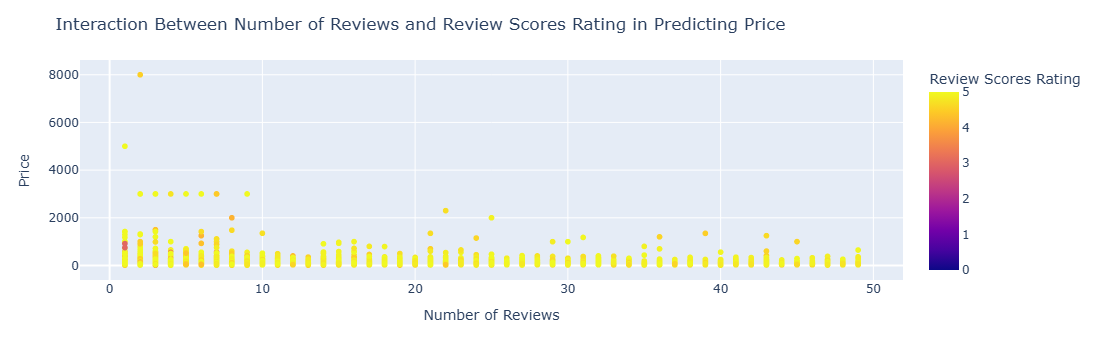

In [54]:

# Filter the DataFrame
df_filtered = df[df['number_of_reviews'] < 50]

# Create an interactive scatter plot
fig = px.scatter(df_filtered, x="number_of_reviews", y="price", color="review_scores_rating", 
                 labels={"number_of_reviews": "Number of Reviews", "price": "Price", "review_scores_rating": "Review Scores Rating"})
fig.update_layout(title="Interaction Between Number of Reviews and Review Scores Rating in Predicting Price")
fig.show()


In [55]:
#choosing some variables to observe their relations
selected_columns = [ "accommodates", "bathrooms", "bedrooms", "maximum_nights"]

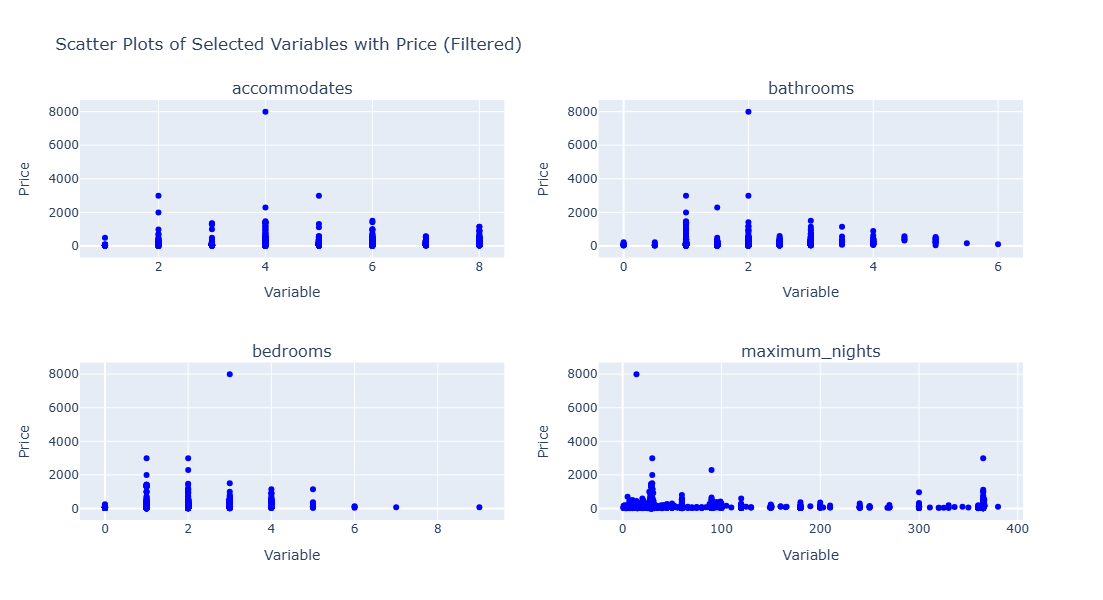

In [56]:

# Filter the data 
df_filtered = df[df['maximum_nights'] < 500]

# Define the selected columns for plotting
selected_columns = ["accommodates", "bathrooms", "bedrooms", "maximum_nights"]

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=selected_columns)

# Loop through the selected columns and create scatter plots
for i, col in enumerate(selected_columns):
    row = i // 2 + 1  # Determine row position (1 or 2)
    col_pos = i % 2 + 1  # Determine column position (1 or 2)
    
    scatter = go.Scatter(x=df_filtered[col], y=df_filtered["price"], mode='markers', name=col, marker=dict(color='blue'))
    
    fig.add_trace(scatter, row=row, col=col_pos)

# Update layout
fig.update_layout(
    height=600, width=800,
    title_text="Scatter Plots of Selected Variables with Price (Filtered)",
    showlegend=False
)

fig.update_xaxes(title_text="Variable")
fig.update_yaxes(title_text="Price")

fig.show()


In [57]:
# Let's compute the correlation coefficients
corr = df[selected_columns].corr(method=lambda x, y: pearsonr(x, y)[0])

# Let's compute the the p-values
pvalues = df[selected_columns].corr(method=lambda x, y: pearsonr(x, y)[1])

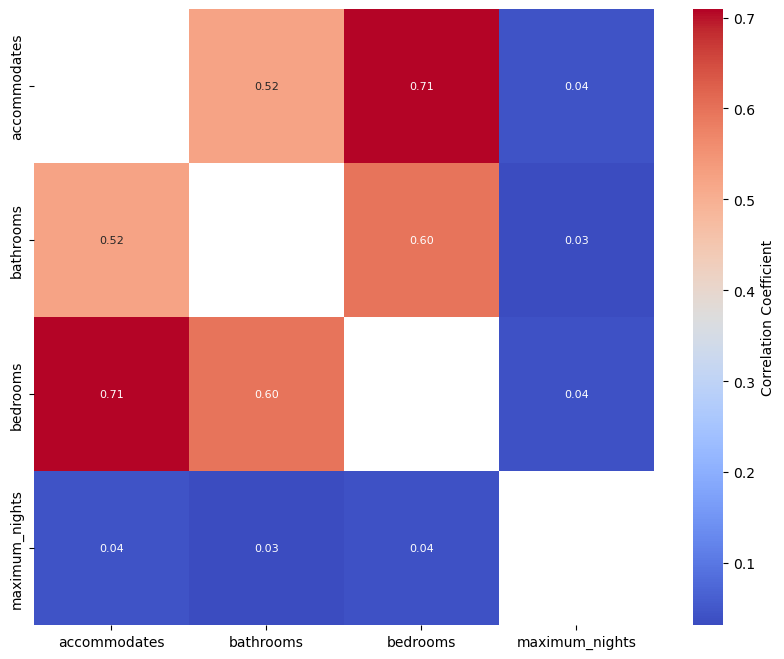

In [58]:
# Create a mask to show only statistically significant correlations (e.g., p-value < 0.05)
mask_significant = pvalues < 0.05
plt.figure(figsize=(10, 8))
# Plot the correlation heatmap with only significant values
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', mask=~mask_significant, annot_kws={"size": 8}, cbar_kws={'label': 'Correlation Coefficient'})
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight') 
plt.show()

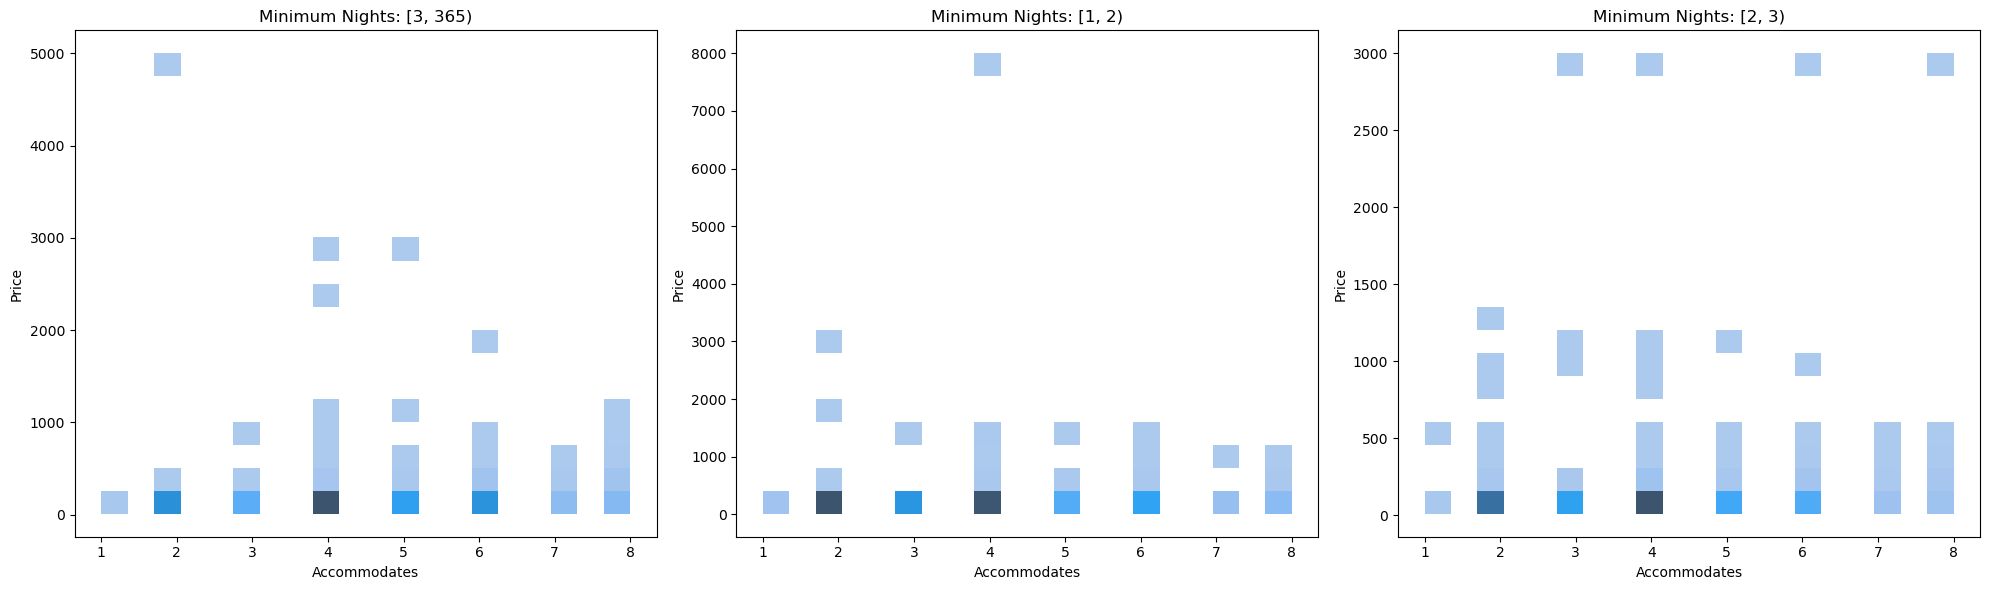

In [59]:

# List of unique minimum_nights values
unique_min_nights = df["minimum_nights"].unique()

# Create a grid of subplots based on the number of unique minimum_nights
fig, axes = plt.subplots(1, len(unique_min_nights), figsize=(20, 6))

# Loop over each unique minimum_nights value to create a histogram
for ax, min_night in zip(axes, unique_min_nights):
    # Filter the dataframe for the current minimum_night
    df_filtered = df[df["minimum_nights"] == min_night]
    
    # Create the histogram for price vs accommodates
    sns.histplot(df_filtered, x="accommodates", y="price", kde=False, ax=ax, bins=20)
    ax.set_title(f"Minimum Nights: {min_night}")
    ax.set_xlabel("Accommodates")
    ax.set_ylabel("Price")

# Adjust layout
plt.tight_layout()
plt.show()


Adding some non-linear relationships and interaction terms

In [61]:
df["num_score_reviews_inter"]=df["number_of_reviews"]*df["review_scores_rating"]
df["bedr_sq"]=df["bedrooms"]**2
df["bed_bath_inter"]=df["bathrooms"]*df["bedrooms"]

In [62]:
# Normalize, remove special characters, and clean column names
df.columns = [unicodedata.normalize("NFKD", col).strip() for col in df.columns]  # Normalize Unicode & strip spaces
df.columns = df.columns.astype(str)  # Ensure all columns are strings
df.columns = df.columns.str.replace('[', '_', regex=False).str.replace(']', '_', regex=False)  # Remove brackets
df.columns = df.columns.str.replace(r'[^a-zA-Z0-9]', '_', regex=True)  # Replace all non-alphanumeric characters
df.columns = df.columns.str.replace(r'_+', '_', regex=True)  # Replace multiple underscores with a single one
df.columns = df.columns.str.strip('_')  # Remove leading/trailing underscores


In [63]:
df.to_csv("airbnb_analysis_listing16.csv", index=False)

# Part2

In [65]:
df = pd.read_csv("airbnb_analysis_listing16.csv")

In [66]:
# Normalize, remove special characters, and clean column names
df.columns = [unicodedata.normalize("NFKD", col).strip() for col in df.columns]  # Normalize Unicode & strip spaces
df.columns = df.columns.astype(str)  # Ensure all columns are strings
df.columns = df.columns.str.replace('[', '_', regex=False).str.replace(']', '_', regex=False)  # Remove brackets
df.columns = df.columns.str.replace(r'[^a-zA-Z0-9]', '_', regex=True)  # Replace all non-alphanumeric characters
df.columns = df.columns.str.replace(r'_+', '_', regex=True)  # Replace multiple underscores with a single one
df.columns = df.columns.str.strip('_')  # Remove leading/trailing underscores


In [67]:
var_list=df.columns

In [68]:
formula = "price ~ " + " + ".join(df.columns.difference(["price"]))

In [69]:
y, X = dmatrices(formula, data=df)

In [70]:
# Split the data into a training set and a hold-out test set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 1. OLS Model

In [72]:
# Fit the OLS model to the training data
ols_model = LinearRegression()
start_time = time.time()  # Start the timer
ols_model.fit(X_train, y_train)
train_time = time.time() - start_time  # Compute training time

# Make predictions on the test data
y_hat = ols_model.predict(X_test)

# Evaluate the model on the test set
ols_mse = mean_squared_error(y_test, y_hat)
ols_rmse = np.sqrt(ols_mse)
ols_r2 = r2_score(y_test, y_hat)

# Perform K-fold cross-validation on the training set to calculate CV RMSE
cv_rmse_ols = -cross_val_score(ols_model, X_train, y_train.ravel(), cv=5, scoring="neg_root_mean_squared_error").mean()

# Store results in a DataFrame
results_ols = pd.DataFrame([{
    "Model": "OLS (Linear Regression)",
    "MSE": round(ols_mse, 4),
    "RMSE": round(ols_rmse, 4),
    "R²": round(ols_r2, 4),
    "Train Time (s)": round(train_time, 4),
    "CV RMSE": round(cv_rmse_ols, 4)
}])

# Display the results table
print(results_ols)


                     Model         MSE      RMSE     R²  Train Time (s)  \
0  OLS (Linear Regression)  16177.1903  127.1896  0.058          4.1565   

        CV RMSE  
0  2.686945e+08  


# 2. Lasso Model

In [74]:
# Initialize the ElasticNet (Lasso) model
lasso_model = ElasticNet(l1_ratio=1, fit_intercept=True)

# Perform cross-validation with GridSearchCV
lasso_model_cv = GridSearchCV(
    lasso_model,
    {"alpha": [i / 100 for i in range(1, 26, 4)]},
    cv=5,
    scoring="neg_root_mean_squared_error",
    verbose=3,
)

# Scale the training data before fitting the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform only the training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data with the same scaler
y_train = y_train.ravel()  # Ensuring y_train is a 1D array

# Measure the training time
start_time = time.time()
lasso_model_cv.fit(X_train_scaled, y_train)
train_time = time.time() - start_time  # Compute training time

# Get the best model and its parameters
best_alpha = lasso_model_cv.best_params_
best_RMSE = lasso_model_cv.best_score_
best_lasso = lasso_model_cv.best_estimator_

# Make predictions with the best Lasso model on the test data
y_hat = best_lasso.predict(X_test_scaled)

# Evaluate the model on the test set
lasso_mse = mean_squared_error(y_test, y_hat)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, y_hat)

# Store results in a DataFrame
results_lasso = pd.DataFrame([{
    "Model": "Lasso (ElasticNet)",
    "MSE": round(lasso_mse, 4),
    "RMSE": round(lasso_rmse, 4),
    "R²": round(lasso_r2, 4),
    "Train Time (s)": round(train_time, 4),
    "CV RMSE": -round(best_RMSE, 4)  # The value for RMSE from CV is negative by default
}])

# Display the results table
print(results_lasso)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .....................alpha=0.01;, score=-122.772 total time=  29.1s
[CV 2/5] END .....................alpha=0.01;, score=-123.058 total time=  25.7s
[CV 3/5] END .....................alpha=0.01;, score=-117.744 total time=  24.6s
[CV 4/5] END .....................alpha=0.01;, score=-202.486 total time=  25.0s
[CV 5/5] END .....................alpha=0.01;, score=-109.631 total time=  25.1s
[CV 1/5] END .....................alpha=0.05;, score=-122.600 total time=  23.0s
[CV 2/5] END .....................alpha=0.05;, score=-122.684 total time=  24.4s
[CV 3/5] END .....................alpha=0.05;, score=-117.577 total time=  23.8s
[CV 4/5] END .....................alpha=0.05;, score=-202.467 total time=  25.2s
[CV 5/5] END .....................alpha=0.05;, score=-109.483 total time=  24.1s
[CV 1/5] END .....................alpha=0.09;, score=-122.500 total time=   9.3s
[CV 2/5] END .....................alpha=0.09;, sc

# 3.Random Forrest


In [76]:
# Initialize the Random Forest Regressor
rfr = RandomForestRegressor(
    random_state=42,
    criterion="squared_error",
    n_estimators=100,  # Increased number of trees for stability
    oob_score=True,
    n_jobs=-1  # Use all available CPU cores
)

# Expanded tuning grid for better hyperparameter search
tune_grid = {
    "max_features": [6, 8, 10, 12, "sqrt"],
    "min_samples_split": [2, 5, 10, 15, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_depth": [None, 10, 20, 30],
    "n_estimators": [50, 100, 200],  # Number of trees
}

# RandomizedSearchCV for hyperparameter tuning
rf_random = RandomizedSearchCV(
    rfr,
    tune_grid,
    n_iter=20,
    cv=5,
    scoring="neg_root_mean_squared_error",
    verbose=3,
    random_state=42,
    n_jobs=1  # Disable parallel processing
)

# Fit the model
start_time_rf = time.time()
rf_model_2 = rf_random.fit(X_train, y_train.ravel())  # Train using the training data
train_time_rf = time.time() - start_time_rf  # Compute training time

# Print the best hyperparameters from RandomizedSearchCV
print("Best Hyperparameters:", rf_random.best_params_)

# Get the best model from RandomizedSearchCV
best_rf = rf_random.best_estimator_

# Make predictions with the best model on the test data
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model on the test set
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

# Perform K-fold cross-validation on the training set to calculate CV RMSE
cv_rmse_rf = -cross_val_score(best_rf, X_train, y_train.ravel(), cv=5, scoring="neg_root_mean_squared_error").mean()

# Store the Random Forest results in a DataFrame
results_rf = pd.DataFrame([{
    "Model": "Random Forest Regressor",
    "MSE": round(rf_mse, 4),
    "RMSE": round(rf_rmse, 4),
    "R²": round(rf_r2, 4),
    "Train Time (s)": round(train_time_rf, 4),
    "CV RMSE": round(cv_rmse_rf, 4),

}])

# Display the results table
print(results_rf)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=-116.581 total time=   5.4s
[CV 2/5] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=-117.803 total time=   6.0s
[CV 3/5] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=-108.900 total time=   6.1s
[CV 4/5] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=-200.303 total time=   5.4s
[CV 5/5] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=-99.003 total time=   6.0s
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=-113.985 total time=   3.4s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_est

# 4. XGBoost

In [78]:
# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5]
}

# Initialize the XGBRegressor model
xgb = XGBRegressor(random_state=5)

# Set up the GridSearchCV with 5-fold cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=1, verbose=2, scoring='r2')

# Measure training time
start_time_xgb = time.time()
grid_search_xgb.fit(X_train, y_train)
train_time_xgb = time.time() - start_time_xgb  # Compute training time

# Get the best estimator from GridSearchCV
best_xgb = grid_search_xgb.best_estimator_

# Make predictions using the best model on the test set
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the model on the test set
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred_xgb)

# Perform K-fold cross-validation on the training set to calculate CV RMSE
cv_rmse_xgb = -cross_val_score(best_xgb, X_train, y_train.ravel(), cv=5, scoring="neg_root_mean_squared_error").mean()

# Store the XGBRegressor results in a DataFrame
results_xgb = pd.DataFrame([{
    "Model": "XGBRegressor",
    "MSE": round(xgb_mse, 4),
    "RMSE": round(xgb_rmse, 4),
    "R²": round(xgb_r2, 4),
    "Train Time (s)": round(train_time_xgb, 4),
    "CV RMSE": round(cv_rmse_xgb, 4),
   
}])

# Display the results table
print(results_xgb)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   2.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   2.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   2.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   2.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   3.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_es

# 5. LightGBM

In [80]:

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5]
}

# Initialize the LGBMRegressor model
lgbm = lgb.LGBMRegressor(random_state=5)

# Set up the GridSearchCV with 5-fold cross-validation
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, n_jobs=1, verbose=2, scoring='r2')

# Measure training time
start_time_lgbm = time.time()
grid_search_lgbm.fit(X_train, y_train)
train_time_lgbm = time.time() - start_time_lgbm  # Compute training time

# Get the best estimator from GridSearchCV
best_lgbm = grid_search_lgbm.best_estimator_

# Make predictions using the best model on the test set
y_pred_lgbm = best_lgbm.predict(X_test)

# Evaluate the model on the test set
lgbm_mse = mean_squared_error(y_test, y_pred_lgbm)
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_r2 = r2_score(y_test, y_pred_lgbm)

# Perform K-fold cross-validation on the training set to calculate CV RMSE
cv_rmse_lgbm = -cross_val_score(best_lgbm, X_train, y_train.ravel(), cv=5, scoring="neg_root_mean_squared_error").mean()

# Store the LGBMRegressor results in a DataFrame
results_lgbm = pd.DataFrame([{
    "Model": "LGBMRegressor",
    "MSE": round(lgbm_mse, 4),
    "RMSE": round(lgbm_rmse, 4),
    "R²": round(lgbm_r2, 4),
    "Train Time (s)": round(train_time_lgbm, 4),
    "CV RMSE": round(cv_rmse_lgbm, 4),
    
}])

# Display the results table
print(results_lgbm)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3733
[LightGBM] [Info] Number of data points in the train set: 9446, number of used features: 151
[LightGBM] [Info] Start training from score 102.876244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

  File "C:\Users\behna\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\behna\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\behna\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\behna\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [81]:
final_results = pd.concat([results_ols, results_lasso, results_rf, results_xgb,results_lgbm], ignore_index=True)
final_results

Model         MSE      RMSE      R²  Train Time (s)  \
0  OLS (Linear Regression)  16177.1903  127.1896  0.0580          4.1565   
1       Lasso (ElasticNet)  15876.7908  126.0031  0.0755        453.2866   
2  Random Forest Regressor  13859.2335  117.7252  0.1930        269.0223   
3             XGBRegressor  20272.1871  142.3804 -0.1805        254.5374   
4            LGBMRegressor  15228.6968  123.4046  0.1132         55.1146   

        CV RMSE  
0  2.686945e+08  
1  1.344993e+02  
2  1.141669e+02  
3  1.191720e+02  
4  1.094133e+02

# Discussion of the performance of the models

We can easily check the RMSE and CV RMSE to compare the models. We can observe that the Random Forest model and the LGBMRegressor have better performance than the other models. However, they were much slower than the worst performing model, OLS. LASSO is both slow and has low performance (although performing better than the OLS). It is somehow in my surprise that XGBoost regressor did not provide satisfactory results, as the literature would have suggested. It is interesting that the LGBM model was trained fast (in comparison to other machine learning models) but showed a performance comparable to the relatively slow Random Forrest. If I wanted to choose the two models to make predictions, I would choose LGBM and Random Forrest.
As we saw in the featyre importance part, some variables like the location of the house in the city and neighbourhood were among the most important features in both of the best models. We can argue that they were effective in the prediction about the same city in different date but not in the different city. In terms of CV RMSE we also see that Random Forrest and LGBM are clearly performing better. 

# Feature importance


Top 10 Random Forest Features and Importance Scores:
                                           varname  imp_percentage
454       neighbourhood_Lido_di_Noto_Sicilia_Italy        0.039176
28                             host_listings_count        0.035860
50                                        latitude        0.035537
9                                   bed_bath_inter        0.029758
1208                 neighbourhood_cleansed_Ragusa        0.029536
47                              host_response_rate        0.029332
51                                       longitude        0.027497
15    calculated_host_listings_count_private_rooms        0.027317
48                       host_total_listings_count        0.026150
53                          maximum_minimum_nights        0.026139


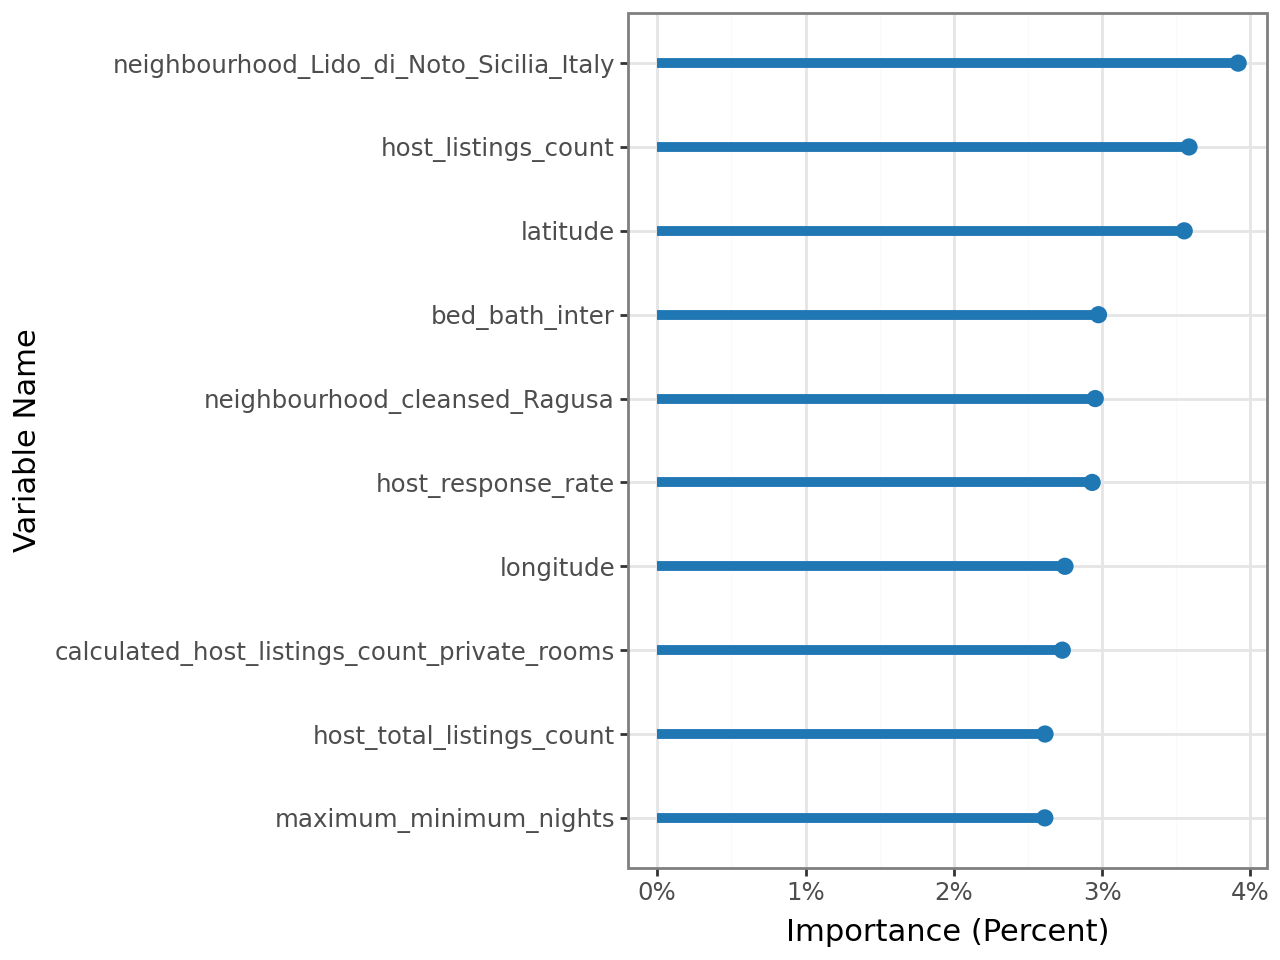

In [85]:
# Create a DataFrame for Random Forest feature importance
rf_feature_importance_df = (
    pd.DataFrame(
        rf_model_2.best_estimator_.feature_importances_, X.design_info.column_names
    )
    .reset_index()
    .rename({"index": "varname", 0: "imp"}, axis=1)
    .assign(factor=lambda x: x["varname"].str.startswith("f_"))
    .assign(
        imp_percentage=lambda x: x["imp"] / x["imp"].sum()
    )
    .sort_values(by=["imp"], ascending=False)
)

# Select the top 10 most important features
rf_feature_importance_df_top_10 = rf_feature_importance_df.head(10)

# List of top 10 features and their importance
top_10_rf_features = rf_feature_importance_df_top_10[["varname", "imp_percentage"]]
print("\nTop 10 Random Forest Features and Importance Scores:")
print(top_10_rf_features)

# Set cutoff for plotting (optional)
cutoff = 0.013
color = ['#1f77b4']

# Create the plot for the top 10 most important features
rf_feature_imp_plot = (
    ggplot(
        rf_feature_importance_df_top_10,
        aes(x="reorder(varname, imp)", y="imp_percentage"),
    )
    + geom_point(color=color[0], size=2.5)
    + geom_segment(
        aes(x="varname", xend="varname", y=0, yend="imp_percentage"),
        color=color[0],
        size=2,
    )
    + ylab("Importance (Percent)")
    + xlab("Variable Name")
    + coord_flip()
    + scale_y_continuous(labels=percent_format())
    + theme_bw()
)

# Display the plot
rf_feature_imp_plot



Top 10 LGBM Features and Importance Scores:
                                           varname  imp_percentage
1321                   review_scores_communication        0.093874
454       neighbourhood_Lido_di_Noto_Sicilia_Italy        0.080069
50                                        latitude        0.076790
9                                   bed_bath_inter        0.055393
5                                 availability_365        0.049698
51                                       longitude        0.036928
6                                  availability_60        0.030889
15    calculated_host_listings_count_private_rooms        0.030371
1318                        review_scores_accuracy        0.025884
7                                  availability_90        0.023641


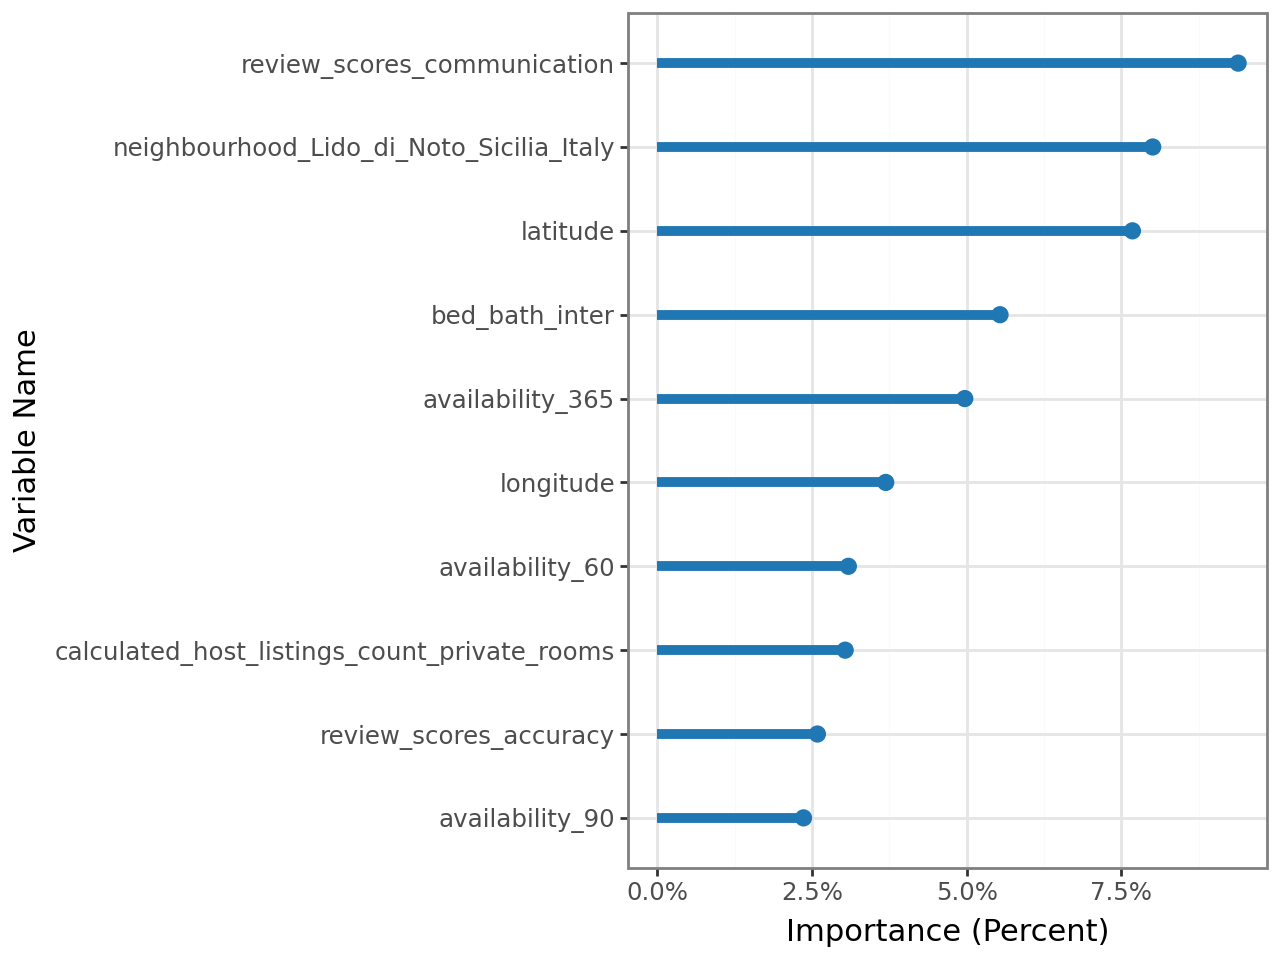

In [86]:
# Create a DataFrame for LGBM feature importance
lgbm_feature_importance_df = (
    pd.DataFrame(
        best_lgbm.feature_importances_, X.design_info.column_names
    )
    .reset_index()
    .rename({"index": "varname", 0: "imp"}, axis=1)
    .assign(factor=lambda x: x["varname"].str.startswith("f_"))
    .assign(
        imp_percentage=lambda x: x["imp"] / x["imp"].sum()
    )
    .sort_values(by=["imp"], ascending=False)
)

# Select the top 10 most important features
lgbm_feature_importance_df_top_10 = lgbm_feature_importance_df.head(10)

# List of top 10 features and their importance
top_10_features = lgbm_feature_importance_df_top_10[["varname", "imp_percentage"]]
print("\nTop 10 LGBM Features and Importance Scores:")
print(top_10_features)

# Set cutoff for plotting (optional)
cutoff = 0.013
color = ['#1f77b4']

# Create the plot for the top 10 most important features
lgbm_feature_imp_plot = (
    ggplot(
        lgbm_feature_importance_df_top_10,
        aes(x="reorder(varname, imp)", y="imp_percentage"),
    )
    + geom_point(color=color[0], size=2.5)
    + geom_segment(
        aes(x="varname", xend="varname", y=0, yend="imp_percentage"),
        color=color[0],
        size=2,
    )
    + ylab("Importance (Percent)")
    + xlab("Variable Name")
    + coord_flip()
    + scale_y_continuous(labels=percent_format())
    + theme_bw()
)

# Display the plot
lgbm_feature_imp_plot


In [87]:
lgbm_feature_importance_df_top_10[["varname","imp_percentage"]]

varname  imp_percentage
1321                   review_scores_communication        0.093874
454       neighbourhood_Lido_di_Noto_Sicilia_Italy        0.080069
50                                        latitude        0.076790
9                                   bed_bath_inter        0.055393
5                                 availability_365        0.049698
51                                       longitude        0.036928
6                                  availability_60        0.030889
15    calculated_host_listings_count_private_rooms        0.030371
1318                        review_scores_accuracy        0.025884
7                                  availability_90        0.023641

In [88]:
top_10_rf_features

varname  imp_percentage
454       neighbourhood_Lido_di_Noto_Sicilia_Italy        0.039176
28                             host_listings_count        0.035860
50                                        latitude        0.035537
9                                   bed_bath_inter        0.029758
1208                 neighbourhood_cleansed_Ragusa        0.029536
47                              host_response_rate        0.029332
51                                       longitude        0.027497
15    calculated_host_listings_count_private_rooms        0.027317
48                       host_total_listings_count        0.026150
53                          maximum_minimum_nights        0.026139

# Discussion on the feature importance

We can observe that some of the most important features in these two best performing models are common. However, their contribution and the level of importance is different across the models. Also, we can see that the two models had importance on some variables that did not appear in the other one. Yet, two models performance and precision are so close to each other. For example, latitute and longitute appear as important in both as they represent the distance from the most important parts of the city. Another observation is that the percentage of importance among important deatures in LGBM model is higher and the difference between them are higher than the RF model. Given that we have variables like longitute and neighborhood in the list of the most important features, we can expect the models to predict more poorly for other city.

# Part II. Validity

# Data wrangling for future time data

In [93]:
# Load the data
df = pd.read_csv("A2_BZ_Sicily_December.csv")
# Check the number of rows
print(f"Number of rows: {df.shape[0]}")

Number of rows: 56117


In [94]:
df.head()

id                          listing_url       scrape_id last_scraped  \
0    7011    https://www.airbnb.com/rooms/7011  20240330234343   2024-03-31   
1   83851   https://www.airbnb.com/rooms/83851  20240330234343   2024-03-31   
2   84046   https://www.airbnb.com/rooms/84046  20240330234343   2024-04-01   
3  228982  https://www.airbnb.com/rooms/228982  20240330234343   2024-03-31   
4  230713  https://www.airbnb.com/rooms/230713  20240330234343   2024-03-31   

            source                                  name  \
0      city scrape  SEASIDE - Historic Antique Residence   
1      city scrape    EMERALD HOLIDAY HOME app. in villa   
2  previous scrape          Weekidea Home Rental Palermo   
3      city scrape       Villa U Marchisi BnB and garden   
4      city scrape              B&B San Martino - Room 1   

                                         description  \
0  WINEYARD WITH COLOURS OF THE SEASIDE.<br /><br...   
1  EMERALD HOUSE, app. in VILLA WITH BEAUTIFUL VE...   
2  Very nice and clean apartment that provides a ...   
3                                                NaN   
4  The B&B is centrally located and allows you to...   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  The B&B is situated in a very quite area. Near...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/miso/Hosting-...    16888  ...   
1  https://a0.muscache.com/pictures/24771175/8b2d...   457543  ...   
2  https://a0.muscache.com/pictures/74534141/6bf7...   458949  ...   
3  https://a0.muscache.com/pictures/7e7c8177-8ab6...  1195185  ...   
4  https://a0.muscache.com/pictures/d1d099a1-4151...  1205928  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.71                   4.57                4.57   
1                        5.00                   4.71                5.00   
2                        4.84                   4.59                4.81   
3                        4.96                   4.32                4.75   
4                        4.71                   4.00                4.43   

           license instant_bookable calculated_host_listings_count  \
0              NaN                t                             10   
1              NaN                f                              1   
2              NaN                f                              1   
3  19088011C100746                t                              4   
4              NaN                t                              4   

  calculated_host_listings_count_entire_homes  \
0                                          10   
1                                           1   
2                                           1   
3                                           1   
4                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            1   
4                                            4   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.18  
1                                           0              0.11  
2                                           0              0.23  
3                                           0              0.49  
4                                           0              0.06  

[5 rows x 75 columns]

In [95]:
# dropping some variables that are not a factor to determine the price
drops = [
    "id",
    "host_verifications",
    "host_since",
    "scrape_id",
    'source', 
    'name',
    'amenities',
    'description', 
    'picture_url',
    'host_id',
    'host_url',
    'host_name',
    "host_thumbnail_url",
    "host_picture_url",
    "listing_url",
    "picture_url",
    "host_url",
    "last_scraped",
    "description",
    "neighborhood_overview",
    "host_about",
    "host_response_time",
    "name",
    'host_about',
    'host_neighbourhood',
    'license',
    "calendar_last_scraped",
    "first_review",
    "last_review"
]

df.drop(columns=drops, inplace=True)


In [96]:
df["price"].isna().sum()

4419

In [97]:
# drop if no target
df = df.loc[lambda x: x.price.notnull()]

In [98]:

df["bathrooms1"] = df["bathrooms_text"].str.extract("(\d+\.?\d*)").astype(float)
df.drop(columns=['bathrooms_text'], inplace=True)
df["bathrooms"] = df["bathrooms"].fillna(df["bathrooms1"])
df.drop(columns=["bathrooms1"], inplace=True)

In [99]:
#Fills missing (NaN) values in bathrooms with the median of the non-missing values.
#Filling missing values in beds with number of accomodation
# 2. imput when few, not that important
df = df.assign(
    flag_bathrooms=np.multiply(df.bathrooms.isna(), 1),
    bathrooms=lambda x: x["bathrooms"].fillna(np.median(x["bathrooms"].dropna())),
    flag_beds=np.multiply(df.beds.isna(), 1),
    beds=lambda x: np.where(x["beds"].isnull(), x["accommodates"], x["beds"]),
    flag_minimum_nights=np.multiply(df.minimum_nights.isna(), 1),
    minimum_nights=lambda x: x["minimum_nights"].fillna(1),
    flag_number_of_reviews=np.multiply(df.number_of_reviews.isna(), 1),
    number_of_reviews=lambda x: x["number_of_reviews"].fillna(1),
)

In [100]:
df["accommodates"].value_counts()

accommodates
4     15918
2     11321
6      6776
3      5661
5      5374
8      2228
7      1469
10      860
9       485
12      409
1       351
16      317
11      197
14      165
13       95
15       72
Name: count, dtype: int64

In [101]:
# We focus on accomodations with n<9
df = df.loc[lambda x: x["accommodates"] < 9]

In [102]:
property_counts = df["property_type"].value_counts()

# Map the counts to the DataFrame
df["property_counts"] = df["property_type"].map(property_counts)

# Filter property types with counts greater than 300
df = df[df["property_counts"] > 300]

# drop the "property_counts" column after filtering if not needed
df.drop(columns=["property_counts"], inplace=True)

In [103]:
property_counts = df["host_location"].value_counts()

# Map the counts to the DataFrame
df["host_counts"] = df["host_location"].map(property_counts)

# Filter property types with counts greater than 300
df = df[df["host_counts"] > 300]

# drop the "property_counts" column after filtering if not needed
df.drop(columns=["host_counts"], inplace=True)



In [104]:
# List of object columns to transform
columns_to_encode = ["neighbourhood", "host_location", "property_type", "neighbourhood_cleansed",  "room_type"]

# Apply one-hot encoding directly to df
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True, dtype=int)

 

In [105]:
t_f_vars=["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "instant_bookable", "has_availability"]
df[t_f_vars].head()

host_is_superhost host_has_profile_pic host_identity_verified  \
0                  t                    t                      t   
1                  f                    t                      t   
5                  t                    t                      t   
6                  t                    t                      t   
15                 t                    t                      t   

   instant_bookable has_availability  
0                 t                t  
1                 f                t  
5                 f                t  
6                 f                t  
15                t                t

In [106]:
df[t_f_vars] = df[t_f_vars].apply(lambda x: x.map({"t": 1, "f": 0}))

In [107]:
df[t_f_vars]=df[t_f_vars].fillna(0).astype(int)

In [108]:
cols = ["host_acceptance_rate", "host_response_rate"]

df[cols] = df[cols].apply(lambda x: pd.to_numeric(x.str.rstrip("%"), errors="coerce"))  # Remove "%" and convert to float
for col in cols:
    df[f"flag_{col}"] = np.multiply(df[col].isna(), 1)

df[cols] = df[cols].fillna(df[cols].mean()).astype(int)  # Fill NaN with mean and convert to int


In [109]:
df["price"] = df["price"].replace({'\$': '', ',': '', '\.00': ''}, regex=True).astype(int)

In [110]:
missing_values = df.isna().sum()  # Counts missing values for each column
missing_values_sorted = missing_values.sort_values(ascending=False)  # Sorts in descending order
print(missing_values_sorted)

calendar_updated                                                               19498
neighbourhood_group_cleansed                                                   19498
review_scores_location                                                          4730
review_scores_checkin                                                           4729
review_scores_value                                                             4729
review_scores_communication                                                     4727
review_scores_accuracy                                                          4726
review_scores_cleanliness                                                       4726
review_scores_rating                                                            4721
reviews_per_month                                                               4721
bedrooms                                                                           5
host_response_rate                                               

In [111]:
df = df.loc[:, df.isna().sum() <= 9000] 

In [112]:
# Define bins
bins = pd.IntervalIndex.from_tuples(
    [(1, 2), (2, 3), (3, max(df.minimum_nights))], closed="left"
)

# Use pd.cut with labels directly
f_min_n = pd.cut(df["minimum_nights"].to_list(), bins, labels=[1, 2, 3])

# Replace the original column with the new binned data
df["minimum_nights"] = f_min_n

# Check the value counts of the binned categories
df["minimum_nights"].value_counts(dropna=False)


minimum_nights
[3.0, 365.0)    7320
[1.0, 2.0)      6504
[2.0, 3.0)      5671
NaN                3
Name: count, dtype: int64

In [113]:
df.shape

(19498, 1323)

In [114]:
df.head()

host_response_rate  host_acceptance_rate  host_is_superhost  \
0                  100                   100                  1   
1                  100                    99                  0   
5                  100                   100                  1   
6                  100                   100                  1   
15                 100                   100                  1   

    host_listings_count  host_total_listings_count  host_has_profile_pic  \
0                    11                         12                     1   
1                     4                          5                     1   
5                     3                          3                     1   
6                     3                          4                     1   
15                   16                         17                     1   

    host_identity_verified  latitude  longitude  accommodates  ...  \
0                        1  37.83969   12.47949             6  ...   
1                        1  38.02511   12.88848             4  ...   
5                        1  37.30907   13.58502             2  ...   
6                        1  37.65147   15.19612             2  ...   
15                       1  38.46296   14.95475             2  ...   

    neighbourhood_cleansed_Viagrande  neighbourhood_cleansed_Villabate  \
0                                  0                                 0   
1                                  0                                 0   
5                                  0                                 0   
6                                  0                                 0   
15                                 0                                 0   

    neighbourhood_cleansed_Villafranca Sicula  \
0                                           0   
1                                           0   
5                                           0   
6                                           0   
15                                          0   

    neighbourhood_cleansed_Villafranca Tirrena  \
0                                            0   
1                                            0   
5                                            0   
6                                            0   
15                                           0   

   neighbourhood_cleansed_Villarosa  neighbourhood_cleansed_Vittoria  \
0                                 0                                0   
1                                 0                                0   
5                                 0                                0   
6                                 0                                0   
15                                0                                0   

    neighbourhood_cleansed_Zafferana Etnea  room_type_Private room  \
0                                        0                       0   
1                                        0                       0   
5                                        0                       1   
6                                        0                       0   
15                                       0                       0   

    flag_host_acceptance_rate  flag_host_response_rate  
0                           0                        0  
1                           0                        0  
5                           0                        0  
6                           0                        0  
15                          0                        0  

[5 rows x 1323 columns]

In [115]:
df = df.dropna()

In [116]:
df["num_score_reviews_inter"]=df["number_of_reviews"]*df["review_scores_rating"]
df["bedr_sq"]=df["bedrooms"]**2
df["bed_bath_inter"]=df["bathrooms"]*df["bedrooms"]

In [117]:
# Normalize, remove special characters, and clean column names
df.columns = [unicodedata.normalize("NFKD", col).strip() for col in df.columns]  # Normalize Unicode & strip spaces
df.columns = df.columns.astype(str)  # Ensure all columns are strings
df.columns = df.columns.str.replace('[', '_', regex=False).str.replace(']', '_', regex=False)  # Remove brackets
df.columns = df.columns.str.replace(r'[^a-zA-Z0-9]', '_', regex=True)  # Replace all non-alphanumeric characters
df.columns = df.columns.str.replace(r'_+', '_', regex=True)  # Replace multiple underscores with a single one
df.columns = df.columns.str.strip('_')  # Remove leading/trailing underscores

In [118]:
df.to_csv("airbnb_analysis_listing_future_data2.csv", index=False)

# data rangling for the other city

In [120]:
# Load the data
df= pd.read_csv("C:/Users/behna/Desktop/ASSIGNMENT2/DATA/Florence 20 December.csv")
# Check the number of rows
print(f"Number of rows: {df.shape[0]}")

Number of rows: 12703


In [121]:
# dropping some variables that are not a factor to determine the price
drops = [
    "id",
    "host_verifications",
    "host_since",
    "scrape_id",
    'source', 
    'name',
    'amenities',
    'description', 
    'picture_url',
    'host_id',
    'host_url',
    'host_name',
    "host_thumbnail_url",
    "host_picture_url",
    "listing_url",
    "picture_url",
    "host_url",
    "last_scraped",
    "description",
    "neighborhood_overview",
    "host_about",
    "host_response_time",
    "name",
    'host_about',
    'host_neighbourhood',
    'license',
    "calendar_last_scraped",
    "first_review",
    "last_review"
]

df.drop(columns=drops, inplace=True)


In [122]:
df["price"].isna().sum()

1015

In [123]:
# drop if no target
df = df.loc[lambda x: x.price.notnull()]

In [124]:
df["bathrooms1"] = df["bathrooms_text"].str.extract("(\d+\.?\d*)").astype(float)
df.drop(columns=['bathrooms_text'], inplace=True)
df["bathrooms"] = df["bathrooms"].fillna(df["bathrooms1"])
df.drop(columns=["bathrooms1"], inplace=True)

In [125]:
#Fills missing (NaN) values in bathrooms with the median of the non-missing values.
#Filling missing values in beds with number of accomodation
# 2. imput when few, not that important
df = df.assign(
    flag_bathrooms=np.multiply(df.bathrooms.isna(), 1),
    bathrooms=lambda x: x["bathrooms"].fillna(np.median(x["bathrooms"].dropna())),
    flag_beds=np.multiply(df.beds.isna(), 1),
    beds=lambda x: np.where(x["beds"].isnull(), x["accommodates"], x["beds"]),
    flag_minimum_nights=np.multiply(df.minimum_nights.isna(), 1),
    minimum_nights=lambda x: x["minimum_nights"].fillna(1),
    flag_number_of_reviews=np.multiply(df.number_of_reviews.isna(), 1),
    number_of_reviews=lambda x: x["number_of_reviews"].fillna(1),
)

In [126]:
df["accommodates"].value_counts()

accommodates
4     3892
2     3425
6     1366
3     1154
5      829
8      306
1      244
7      222
10      82
9       57
12      50
16      31
11      12
14       9
13       6
15       3
Name: count, dtype: int64

In [127]:
# We focus on accomodations with n<9
df = df.loc[lambda x: x["accommodates"] < 9]

In [128]:
property_counts = df["property_type"].value_counts()

# Map the counts to the DataFrame
df["property_counts"] = df["property_type"].map(property_counts)

# Filter property types with counts greater than 300
df = df[df["property_counts"] > 300]

# drop the "property_counts" column after filtering if not needed
df.drop(columns=["property_counts"], inplace=True)

In [129]:
host_counts = df["host_location"].value_counts()

# Map the counts to the DataFrame
df["host_counts"] = df["host_location"].map(host_counts)

# Filter property types with counts greater than 300
df = df[df["host_counts"] > 300]

# drop the "property_counts" column after filtering if not needed
df.drop(columns=["host_counts"], inplace=True)



In [130]:
# List of object columns to transform
columns_to_encode = ["neighbourhood", "host_location", "property_type", "neighbourhood_cleansed",  "room_type"]

# Apply one-hot encoding directly to df
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True, dtype=int)

 

In [131]:
t_f_vars=["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "instant_bookable", "has_availability"]
df[t_f_vars].head()

host_is_superhost host_has_profile_pic host_identity_verified  \
1                 f                    t                      t   
4                 f                    t                      t   
5                 f                    t                      t   
6                 t                    t                      t   
8                 t                    t                      t   

  instant_bookable has_availability  
1                f                t  
4                f                t  
5                t                t  
6                f                t  
8                f                t

In [132]:
df[t_f_vars] = df[t_f_vars].apply(lambda x: x.map({"t": 1, "f": 0}))

In [133]:
df[t_f_vars].head()

host_is_superhost  host_has_profile_pic  host_identity_verified  \
1                0.0                     1                       1   
4                0.0                     1                       1   
5                0.0                     1                       1   
6                1.0                     1                       1   
8                1.0                     1                       1   

   instant_bookable  has_availability  
1                 0               1.0  
4                 0               1.0  
5                 1               1.0  
6                 0               1.0  
8                 0               1.0

In [134]:
df[t_f_vars]=df[t_f_vars].fillna(0).astype(int)

In [135]:
df[t_f_vars].head()

host_is_superhost  host_has_profile_pic  host_identity_verified  \
1                  0                     1                       1   
4                  0                     1                       1   
5                  0                     1                       1   
6                  1                     1                       1   
8                  1                     1                       1   

   instant_bookable  has_availability  
1                 0                 1  
4                 0                 1  
5                 1                 1  
6                 0                 1  
8                 0                 1

In [136]:
cols = ["host_acceptance_rate", "host_response_rate"]

df[cols] = df[cols].apply(lambda x: pd.to_numeric(x.str.rstrip("%"), errors="coerce"))  # Remove "%" and convert to float
for col in cols:
    df[f"flag_{col}"] = np.multiply(df[col].isna(), 1)

df[cols] = df[cols].fillna(df[cols].mean()).astype(int)  # Fill NaN with mean and convert to int


In [137]:
df["price"] = df["price"].replace({'\$': '', ',': '', '\.00': ''}, regex=True).astype(int)

In [138]:
missing_values = df.isna().sum()  # Counts missing values for each column
missing_values_sorted = missing_values.sort_values(ascending=False)  # Sorts in descending order
print(missing_values_sorted)

calendar_updated                                                            7044
neighbourhood_group_cleansed                                                7044
review_scores_rating                                                         651
review_scores_accuracy                                                       651
review_scores_cleanliness                                                    651
reviews_per_month                                                            651
review_scores_checkin                                                        651
review_scores_communication                                                  651
review_scores_location                                                       651
review_scores_value                                                          651
bedrooms                                                                       1
host_response_rate                                                             0
neighbourhood_Florence, Ital

In [139]:
df = df.loc[:, df.isna().sum() <= 7000] 

In [140]:
# Define bins
bins = pd.IntervalIndex.from_tuples(
    [(1, 2), (2, 3), (3, max(df.minimum_nights))], closed="left"
)

# Use pd.cut with labels directly
f_min_n = pd.cut(df["minimum_nights"].to_list(), bins, labels=[1, 2, 3])

# Replace the original column with the new binned data
df["minimum_nights"] = f_min_n

# Check the value counts of the binned categories
df["minimum_nights"].value_counts(dropna=False)


minimum_nights
[2.0, 3.0)      2779
[1.0, 2.0)      2477
[3.0, 365.0)    1787
NaN                1
Name: count, dtype: int64

In [141]:
df = df.dropna()

In [142]:
df["num_score_reviews_inter"]=df["number_of_reviews"]*df["review_scores_rating"]
df["bedr_sq"]=df["bedrooms"]**2
df["bed_bath_inter"]=df["bathrooms"]*df["bedrooms"]

In [143]:


# Normalize, remove special characters, and clean column names
df.columns = [unicodedata.normalize("NFKD", col).strip() for col in df.columns]  # Normalize Unicode & strip spaces
df.columns = df.columns.astype(str)  # Ensure all columns are strings
df.columns = df.columns.str.replace('[', '_', regex=False).str.replace(']', '_', regex=False)  # Remove brackets
df.columns = df.columns.str.replace(r'[^a-zA-Z0-9]', '_', regex=True)  # Replace all non-alphanumeric characters
df.columns = df.columns.str.replace(r'_+', '_', regex=True)  # Replace multiple underscores with a single one
df.columns = df.columns.str.strip('_')  # Remove leading/trailing underscores


In [144]:
df.to_csv("airbnb_analysis_listing_other_City_data2.csv", index=False)

# checking the models on the future data

In [146]:
# Load the data
df = pd.read_csv("airbnb_analysis_listing_future_data2.csv")

In [147]:
var_list_fu_data=df.columns

Some columns were present in training the models that are necessary here. Also, the columns that were not in training should be removed.

In [149]:
# Ensure var_list_fu_data has only the columns in var_list
df = df.loc[:, df.columns.intersection(var_list)]

# Identify missing columns that are in var_list but not in var_list_fu_data
missing_columns = set(var_list) - set(df.columns)

# Add missing columns with zeros
for col in missing_columns:
    df[col] = 0

# Reorder columns to match var_list
df = df[var_list]


In [150]:
df.shape

(14760, 1326)

In [151]:


# Normalize, remove special characters, and clean column names
df.columns = [unicodedata.normalize("NFKD", col).strip() for col in df.columns]  # Normalize Unicode & strip spaces
df.columns = df.columns.astype(str)  # Ensure all columns are strings
df.columns = df.columns.str.replace('[', '_', regex=False).str.replace(']', '_', regex=False)  # Remove brackets
df.columns = df.columns.str.replace(r'[^a-zA-Z0-9]', '_', regex=True)  # Replace all non-alphanumeric characters
df.columns = df.columns.str.replace(r'_+', '_', regex=True)  # Replace multiple underscores with a single one
df.columns = df.columns.str.strip('_')  # Remove leading/trailing underscores


In [152]:
y, X = dmatrices("price ~ " + " + ".join(df.columns.difference(["price"])), data=df)

# 1. OLS Model

In [154]:
#prediction
y_hat = ols_model.predict(X)

# Evaluate the model
ols_mse = mean_squared_error(y, y_hat)
ols_rmse = np.sqrt(ols_mse)
ols_r2 = r2_score(y, y_hat)

# Store results in a DataFrame
results_ols = pd.DataFrame([{
    "Model": "OLS (Linear Regression)",
    "MSE": round(ols_mse, 4),
    "RMSE": round(ols_rmse, 4),
    "R²": round(ols_r2, 4),
}])

# Display the results table
print(results_ols)

                     Model         MSE      RMSE     R²
0  OLS (Linear Regression)  16234.2027  127.4135  0.232


# 2. Lasso Model

In [156]:


# Make predictions with the best Lasso model on the test data
y_hat = best_lasso.predict(X)


# Scale the training data before fitting the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)  # Fit and transform only the training data
X_test_scaled = scaler.transform(X)  # Transform the test data with the same scaler
y = y.ravel()  # Ensuring y_train is a 1D array


# Evaluate the model on the test set
lasso_mse = mean_squared_error(y, y_hat)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y, y_hat)

# Store results in a DataFrame
results_lasso = pd.DataFrame([{
    "Model": "Lasso (ElasticNet)",
    "MSE": round(lasso_mse, 4),
    "RMSE": round(lasso_rmse, 4),
    "R²": round(lasso_r2, 4),
}])

# Display the results table
print(results_lasso)


                Model           MSE       RMSE        R²
0  Lasso (ElasticNet)  3.731100e+06  1931.6056 -175.4981


# 3.Random Forrest


In [158]:

# Get the best model from RandomizedSearchCV
best_rf = rf_random.best_estimator_

# Make predictions with the best model on the test data
y_pred_rf = best_rf.predict(X)

# Evaluate the model on the test set
rf_mse = mean_squared_error(y, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y, y_pred_rf)


# Store the Random Forest results in a DataFrame
results_rf = pd.DataFrame([{
    "Model": "Random Forest Regressor",
    "MSE": round(rf_mse, 4),
    "RMSE": round(rf_rmse, 4),
    "R²": round(rf_r2, 4),

}])

# Display the results table
print(results_rf)


                     Model       MSE     RMSE      R²
0  Random Forest Regressor  5064.342  71.1642  0.7604


# 4. XGBoost

In [160]:

# Get the best estimator from GridSearchCV
best_xgb = grid_search_xgb.best_estimator_

# Make predictions using the best model on the test set
y_pred_xgb = best_xgb.predict(X)

# Evaluate the model on the test set
xgb_mse = mean_squared_error(y, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y, y_pred_xgb)

# Perform K-fold cross-validation on the training set to calculate CV RMSE
cv_rmse_xgb = -cross_val_score(best_xgb, X_train, y_train.ravel(), cv=5, scoring="neg_root_mean_squared_error").mean()

# Store the XGBRegressor results in a DataFrame
results_xgb = pd.DataFrame([{
    "Model": "XGBRegressor",
    "MSE": round(xgb_mse, 4),
    "RMSE": round(xgb_rmse, 4),
    "R²": round(xgb_r2, 4),

}])

# Display the results table
print(results_xgb)


          Model        MSE     RMSE      R²
0  XGBRegressor  6260.4055  79.1227  0.7039


# 5. LightGBM

In [162]:

# Get the best estimator from GridSearchCV
best_lgbm = grid_search_lgbm.best_estimator_

# Make predictions using the best model on the test set
y_pred_lgbm = best_lgbm.predict(X)

# Evaluate the model on the test set
lgbm_mse = mean_squared_error(y, y_pred_lgbm)
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_r2 = r2_score(y, y_pred_lgbm)


# Store the LGBMRegressor results in a DataFrame
results_lgbm = pd.DataFrame([{
    "Model": "LGBMRegressor",
    "MSE": round(lgbm_mse, 4),
    "RMSE": round(lgbm_rmse, 4),
    "R²": round(lgbm_r2, 4),

}])

# Display the results table
print(results_lgbm)


           Model        MSE     RMSE      R²
0  LGBMRegressor  7048.4709  83.9552  0.6666


In [163]:
final_results = pd.concat([results_ols, results_lasso, results_rf, results_xgb,results_lgbm], ignore_index=True)
final_results

Model           MSE       RMSE        R²
0  OLS (Linear Regression)  1.623420e+04   127.4135    0.2320
1       Lasso (ElasticNet)  3.731100e+06  1931.6056 -175.4981
2  Random Forest Regressor  5.064342e+03    71.1642    0.7604
3             XGBRegressor  6.260405e+03    79.1227    0.7039
4            LGBMRegressor  7.048471e+03    83.9552    0.6666

# Discussion on the experience on the future data

It is an exciting case as althogh we see significant deteriation in R-squared, we still do not see much worse results in performance when we compare the results with the ones from the original dataset. The LASSO model has experienced the worse performance problem as it originates to a significant degree to its construction and also the scaling method. Therefore, we can see that we can not rely on this case in LASSO resluts. OLS model also worsened significantly. When we come to the machine learning models, we are seeing even some slight improvements. We can observe that still Random Forrest is the best performing model followed by LGBM and XGBoost. We see that data from the future does not change this ranking. Also the ratio of the relative performance between these three models stay aproximately the same. 

# checking the models on the other city data

In [167]:
# Load the data
df = pd.read_csv("airbnb_analysis_listing_other_City_data2.csv")

In [168]:
var_list_fu_data=df.columns

Some columns were present in training the models that are necessary here. Also, the columns that were not in training should be removed.

In [170]:
# Ensure var_list_fu_data has only the columns in var_list
df = df.loc[:, df.columns.intersection(var_list)]

# Identify missing columns that are in var_list but not in var_list_fu_data
missing_columns = set(var_list) - set(df.columns)

# Add missing columns with zeros
for col in missing_columns:
    df[col] = 0

# Reorder columns to match var_list
df = df[var_list]


In [171]:


# Normalize, remove special characters, and clean column names
df.columns = [unicodedata.normalize("NFKD", col).strip() for col in df.columns]  # Normalize Unicode & strip spaces
df.columns = df.columns.astype(str)  # Ensure all columns are strings
df.columns = df.columns.str.replace('[', '_', regex=False).str.replace(']', '_', regex=False)  # Remove brackets
df.columns = df.columns.str.replace(r'[^a-zA-Z0-9]', '_', regex=True)  # Replace all non-alphanumeric characters
df.columns = df.columns.str.replace(r'_+', '_', regex=True)  # Replace multiple underscores with a single one
df.columns = df.columns.str.strip('_')  # Remove leading/trailing underscores


In [172]:
y, X = dmatrices("price ~ " + " + ".join(df.columns.difference(["price"])), data=df)

# 1. OLS Model

In [174]:
#prediction
y_hat = ols_model.predict(X)

# Evaluate the model
ols_mse = mean_squared_error(y, y_hat)
ols_rmse = np.sqrt(ols_mse)
ols_r2 = r2_score(y, y_hat)

# Store results in a DataFrame
results_ols = pd.DataFrame([{
    "Model": "OLS (Linear Regression)",
    "MSE": round(ols_mse, 4),
    "RMSE": round(ols_rmse, 4),
    "R²": round(ols_r2, 4),
}])

# Display the results table
print(results_ols)

                     Model          MSE      RMSE      R²
0  OLS (Linear Regression)  697558.8106  835.1999 -0.6936


# 2. Lasso Model

In [176]:


# Make predictions with the best Lasso model on the test data
y_hat = best_lasso.predict(X)


# Scale the training data before fitting the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)  # Fit and transform only the training data
X_test_scaled = scaler.transform(X)  # Transform the test data with the same scaler
y = y.ravel()  # Ensuring y_train is a 1D array


# Evaluate the model on the test set
lasso_mse = mean_squared_error(y, y_hat)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y, y_hat)

# Store results in a DataFrame
results_lasso = pd.DataFrame([{
    "Model": "Lasso (ElasticNet)",
    "MSE": round(lasso_mse, 4),
    "RMSE": round(lasso_rmse, 4),
    "R²": round(lasso_r2, 4),
}])

# Display the results table
print(results_lasso)


                Model           MSE       RMSE       R²
0  Lasso (ElasticNet)  5.504630e+06  2346.1947 -12.3649


# 3.Random Forrest


In [178]:

# Get the best model from RandomizedSearchCV
best_rf = rf_random.best_estimator_

# Make predictions with the best model on the test data
y_pred_rf = best_rf.predict(X)

# Evaluate the model on the test set
rf_mse = mean_squared_error(y, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y, y_pred_rf)


# Store the Random Forest results in a DataFrame
results_rf = pd.DataFrame([{
    "Model": "Random Forest Regressor",
    "MSE": round(rf_mse, 4),
    "RMSE": round(rf_rmse, 4),
    "R²": round(rf_r2, 4),

}])

# Display the results table
print(results_rf)


                     Model          MSE    RMSE      R²
0  Random Forest Regressor  415921.8667  644.92 -0.0098


# 4. XGBoost

In [180]:

# Get the best estimator from GridSearchCV
best_xgb = grid_search_xgb.best_estimator_

# Make predictions using the best model on the test set
y_pred_xgb = best_xgb.predict(X)

# Evaluate the model on the test set
xgb_mse = mean_squared_error(y, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y, y_pred_xgb)

# Perform K-fold cross-validation on the training set to calculate CV RMSE
cv_rmse_xgb = -cross_val_score(best_xgb, X_train, y_train.ravel(), cv=5, scoring="neg_root_mean_squared_error").mean()

# Store the XGBRegressor results in a DataFrame
results_xgb = pd.DataFrame([{
    "Model": "XGBRegressor",
    "MSE": round(xgb_mse, 4),
    "RMSE": round(xgb_rmse, 4),
    "R²": round(xgb_r2, 4),

}])

# Display the results table
print(results_xgb)


          Model          MSE      RMSE      R²
0  XGBRegressor  415011.1697  644.2136 -0.0076


# 5. LightGBM

In [182]:

# Get the best estimator from GridSearchCV
best_lgbm = grid_search_lgbm.best_estimator_

# Make predictions using the best model on the test set
y_pred_lgbm = best_lgbm.predict(X)

# Evaluate the model on the test set
lgbm_mse = mean_squared_error(y, y_pred_lgbm)
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_r2 = r2_score(y, y_pred_lgbm)


# Store the LGBMRegressor results in a DataFrame
results_lgbm = pd.DataFrame([{
    "Model": "LGBMRegressor",
    "MSE": round(lgbm_mse, 4),
    "RMSE": round(lgbm_rmse, 4),
    "R²": round(lgbm_r2, 4),

}])

# Display the results table
print(results_lgbm)


           Model          MSE      RMSE      R²
0  LGBMRegressor  419033.4315  647.3279 -0.0174


In [183]:
final_results = pd.concat([results_ols, results_lasso, results_rf, results_xgb,results_lgbm], ignore_index=True)
final_results

Model           MSE       RMSE       R²
0  OLS (Linear Regression)  6.975588e+05   835.1999  -0.6936
1       Lasso (ElasticNet)  5.504630e+06  2346.1947 -12.3649
2  Random Forest Regressor  4.159219e+05   644.9200  -0.0098
3             XGBRegressor  4.150112e+05   644.2136  -0.0076
4            LGBMRegressor  4.190334e+05   647.3279  -0.0174

# Discussion on the experience on the other city data

In this case we see huge deterioration of the performance across all the models. When it comes to R-Squared, we do not even see any positive values for any of the models. When we compare the RMSE, again LASSO has the worst performance with a high marigin. This can partly come from the scaling problem. RMSE has rised in three machine learning models almost with the same factor. However, we see now that XGBoost has a better performance in terms of RMSE with a really small marigin in comparison to Random Forrest and LGBM (probably based on chance). Therefore, we can argue that when we want to make a prediction based on the data set from another city that has fundamentally different characteristics, the difference between these three models is less highlighted. Probably if we change the city, the ranking of these three in terms of performance could change. Also, it can be argued that if we want to train our models on one data set and test on a different data set we should be really careful so that their characteristics be similar and we should take extra care having in mind that it is hard to make predictions based on different data (at least should expect very low performance). 
As we saw in the former part, some variables like the location of the house in the city and neighbourhood were among the most important features in both of the best models. We can argue that they were effective in the prediction about the same city in different date but not in the different city. 